
## Enzyme-substrate kinetics

We will now solve the differential equations that result from a generic enzimatic reaction. The scheme of the reaction is as follows:
$$ s + e \leftrightarrow  c \rightarrow p + e $$

where $s$ represents the substrate, $e$ represents the enzyme, $c$ represents the complex, and $p$ the product of the reaction. The reaction can be written as three irreversible reactions: 
$$\begin{align*}
s + e \rightarrow  c \\
c \rightarrow s + e \\
c \rightarrow p + e 
 \end{align*}$$


with kinetic constants $k_1$, $k_2$ and $k_3$, respectively. The kinetics of this chemical equations is described by the following set of coupled differential equations 

$$\begin{align*}
  \dot{s}  &= k_2 \cdot c - k_1 \cdot e \cdot s \\
  \dot{c} &= k_1 \cdot e\cdot s - (k_2+k_3) \cdot c\\
  \dot{e} &= (k_2+k_3) \cdot c -k_1 \cdot e \cdot s\\
  \dot{p} &= k_3 \cdot c
  \end{align*}$$
  
  
If we rename variables as $x_1=s,x_2=c, x_3=e, x_4=p$ to use the state vactor approach
$$
\begin{align*}
  \dot{x_1}&= k_2 \cdot x_2 - k_1 x_3 \cdot x_1\\ 
  \dot{x_2}&= k_1 \cdot x_3 \cdot x_1 - (k_2+k_3) \cdot x_2\\
  \dot{x_3}&= (k_2+k_3) \cdot x_2 - k_1 \cdot x_3(t) \cdot x_1 \\ 
  \dot{x_4}&= k_3 \cdot x_2
\end{align*}
$$
We define the ODE problem as follows:
  

In [14]:
function simpleODEEnzyme!(du,u,p,t)
    k1,k2,k3 = p
    du[1] = k2*u[2] - k1*u[1]*u[3]
    du[2] = k1*u[1]*u[3] - (k2 + k3) * u[2]
    du[3] = -k1*u[1]*u[3]+(k2 + k3) * u[2]
    du[4] = k3 * u[2] 
end

simpleODEEnzyme! (generic function with 1 method)

In [2]:
using DifferentialEquations

In [3]:
tspan = (0.0,100)
k1=1e3
k2=0.1
k3=0.05
e0=0.002
s0=0.002


u0=[s0,0,e0,0]
p=[k1,k2,k3];

In [4]:
problem = ODEProblem(simpleODEEnzyme!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 0.0, 0.002, 0.0]

In [8]:
using Plots; gr()

Plots.GRBackend()

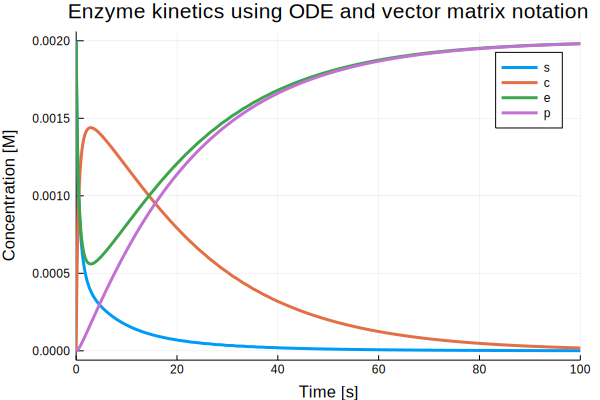

In [15]:
sol = solve(problem)
plot(sol,label=["s","c","e","p"])
title!("Enzyme kinetics using ODE and vector matrix notation")
xlabel!("Time [s]")
ylabel!("Concentration [M]")
#png("Michaelis_menten.png")

We can also use the simpler DSL direct notation (in Julia, we cannot use $e$ for the enzyme, so we use $en$):

In [30]:
enzyme_kinetics! = @ode_def ab begin
  ds = -k1*en*s+k2*c
  dc = k1*en*s-(k2+k3)*c
  den = -k1*en*s+(k2+k3)*c
  dp = k3*c
    end k1 k2 k3

(::ab{getfield(Main, Symbol("##35#39")),getfield(Main, Symbol("##36#40")),getfield(Main, Symbol("##37#41")),Nothing,Nothing,getfield(Main, Symbol("##38#42")),Expr,Expr}) (generic function with 2 methods)

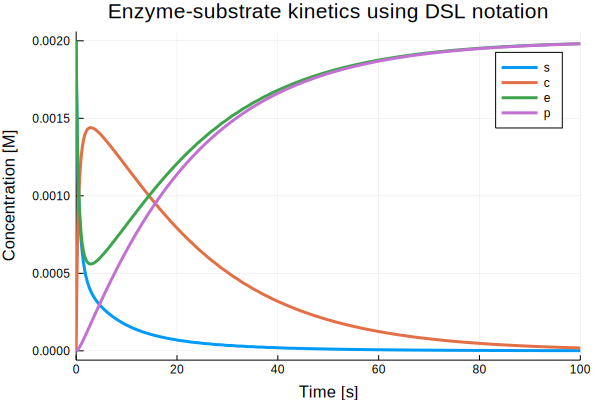

In [31]:
prob = ODEProblem(enzyme_kinetics!,u0,tspan,p)
sol = solve(prob)
plot(sol,label=["s","c","e","p"])
title!("Enzyme-substrate kinetics using DSL notation")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

Since the enzyme is a catalyst that facilitates the reaction but does not react itself, the total concentration of enzyme ($x_2(t)+x_3(t)=x_2(0)+x_3(0)$), so if we assuem there is no complex $x_3(0)=0$ before the reacton starts, we can assume ($x_2(t)+x_3(t)=x_3(0)$).
Therefore, this conservation law allows us to reduce the four differential equations into the following three coupled ordinary differential equations:

\begin{align*}
 \dot{x_1} &= (k_2+k_1 \cdot x_1(t)) \cdot x_2(t) -k_1 \cdot x_3(0)\cdot x_1(t)\\ 
 \dot{x_2}&=  k_1\cdot x_3(0)\cdot x_1(t)-(k_3+k_2+k_1 \cdot x_1(t))  \cdot x_2(t)\\ 
 \dot{x_3}&= k_3\cdot x_2(t)
\end{align*}


In de DSL notation $e + c= e_0$. Therefore:

$$\begin{align*}
  \dot{s}  &= (k_2+k_1 \cdot s) \cdot c -k_1 \cdot e_0 \cdot s\\ 
  \dot{c} &= k_1\cdot e_0\cdot s-(k_3+k_2+k_1 \cdot s) \cdot c\\
  \dot{p} &= k_3 \cdot c
  \end{align*}$$

In [32]:
enzyme_kinetics2! = @ode_def ab begin
  ds = (k2+s*k1)*c-k1*e0*s
  dc = k1*e0*s-(k2+k3+k1*s)*c
  dp = k3*c
    end k1 k2 k3 e0

(::ab{getfield(Main, Symbol("##43#47")),getfield(Main, Symbol("##44#48")),getfield(Main, Symbol("##45#49")),Nothing,Nothing,getfield(Main, Symbol("##46#50")),Expr,Expr}) (generic function with 2 methods)

In [33]:
tspan = (0.0,100.0)
u0=[s0,0,0]
p=[k1,k2,k3,e0];

prob = ODEProblem(enzyme_kinetics2!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.002, 0.0, 0.0]

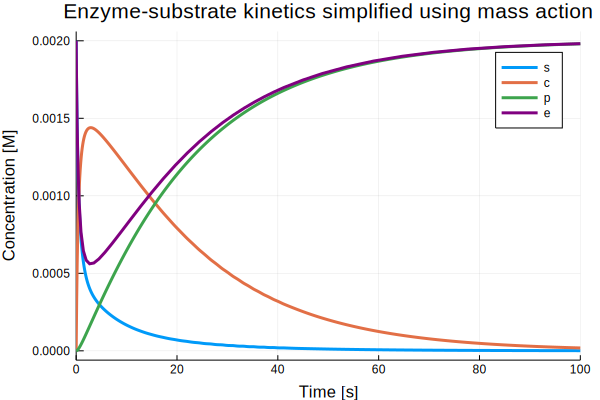

In [34]:
sol_ = solve(prob)
plot(sol_,label=["s","c","p"])
e=[p[4]-u[2] for (u,t) in tuples(sol_)]
plot!(sol_.t,e,
        label="e",
        linealpha = 1,
        linewidth = 3,
        linecolor = :purple)
title!("Enzyme-substrate kinetics simplified using mass action")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## Quasi steady state approximation:

The formation and degradation of the intermediate complex is very fast and reaches equilibrium early in the reaction. 

$$k_1\cdot x_1(0) ≈ k_2 >> k_3$$


The substrate-enzyme binding occurs at much faster time scales than the turnover into product 
(often the case in biologically relevant biochemical reactions)

Under these circumstances one expects that after an initial short transient period there will be a balance between the formation of the enzyme-substrate complex and the breaking apart of complex (either to enzyme and substrate, or to enzyme and product) 

$$ \frac{d c}{dt}= \frac{d e}{dt}=0$$

In these conditions, we can calculate the equilibrium for $c$  

$$c=\frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s}$$

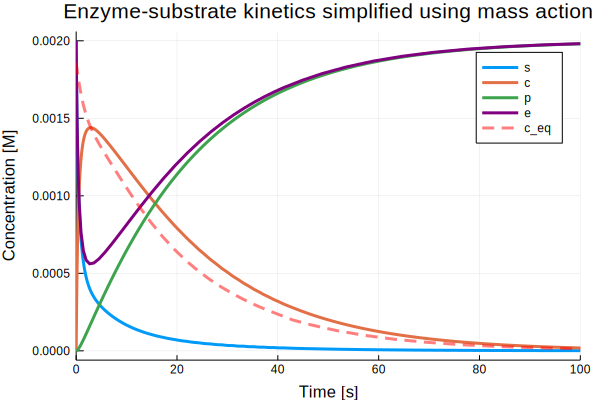

In [35]:
c_eq=[(p[1] * p[4] * u[1])/(p[3]+p[2]+p[1] * u[1]) for (u,t) in tuples(sol)]
plot!(sol.t,c_eq,
        label="c_eq",        
        linealpha = 0.5,
        linewidth = 3,
        linestyle= :dash,
        linecolor = :red)

As we can see, the equilibrium solution $c_{eq}$ is quite close to the concentration of $c$, in this conditions we can simplify all equations as:
  
$$\begin{align*}
  \dot{s}  &= (k_2+k_1 \cdot s) \cdot \frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s} -k_1 \cdot e_0 \cdot s\\ 
  \dot{p}  &= k_3 \frac{k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s}
\end{align*}$$

that rearranging terms becomes simply:

$$\begin{align*}
  \dot{s}  &=- \frac{k_1 \cdot k_3 \cdot e_0 \cdot s}{k_3+k_2+k_1 \cdot s}\\ 
  \dot{p}  &=  \frac{ k_3 \cdot k_1\cdot e_0\cdot s}{k_3+k_2+k_1 \cdot s}
\end{align*}$$

Now, the conservation of mass $s+p=s_0$ allows us to reduce everything to a single ODE:
$$
  \dot{p}  =  \frac{ k_3 \cdot k_1\cdot e_0\cdot (s_0-p)}{k_3+k_2+k_1 \cdot (s_0-p)}
$$

Or, if the divide every term by $k_1$
$$
  \dot{p}  =  \frac{ k_3 \cdot e_0\cdot (s_0-p)}{\frac{k_3+k_2}{k_1}+(s_0-p)}
$$


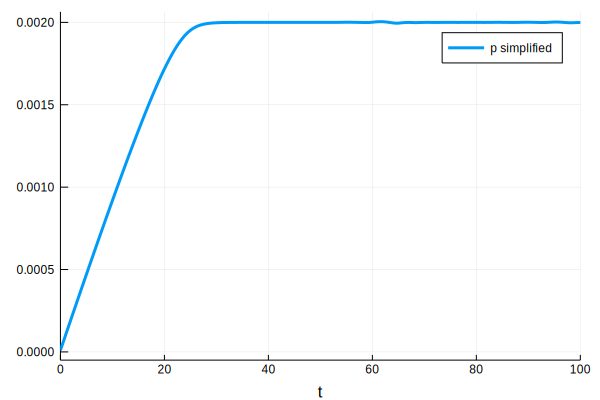

In [36]:
enzyme_kinetics3! = @ode_def ab begin
  dp = (k3 * e0 * (s0 - p))/((k3+k2)/k1 +  (s0 - p))
    end k1 k2 k3 e0 s0
tspan = (0.0,100.0)

u0=[0.00001]
p=[k1,k2,k3,e0,s0];
prob2 = ODEProblem(enzyme_kinetics3!,u0,tspan,p)
sol2 = solve(prob2)
plot(sol2,label=["p simplified"])

We can compare directly this steady state aproximation wit the mass action solution for the product

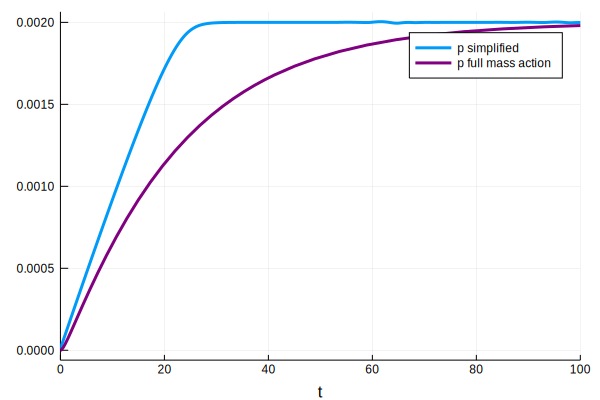

In [37]:
pp=[u[3] for (u,t) in tuples(sol_)]
plot!(sol_.t,pp,
        label="p full mass action",
        linealpha = 1,
        linewidth = 3,
        linecolor = :purple)

The steady state solution aproximates quite well to the rate of the reaction at the starting point of the reaction, but not at the intermediate time points. This, of course, will depend on the reaction parameters and the initial conditions. We can set up a program to test when the steady state aproximation is correct.


## Michaelis-Menten equation: 

The previous equation 

$$
  \dot{p}  =  \frac{ k_3 \cdot e_0\cdot (s_0-p)}{\frac{k_3+k_2}{k_1}+(s_0-p)}
$$

leads to the traditional Michaelis-Menten equation, which predicts the initial turnover rate of the enzymatic reaction $V_0$ as a function of initial substrate concentration $s_0$. So at the initial state of the reaction ($p=0$):

$$
  V_0  =  \frac{ k_3 \cdot e_0\cdot s_0}{\frac{k_3+k_2}{k_1}+s_0}=\frac{ v_{max} \cdot s_0}{K_M+s_0}
$$


where the constant $K_M = \frac{k_3+k_2}{k_1}$ is called the Michaelis constant and $v_{max}= k_3 \cdot e_0$ is the maximum turn-over rate. 
The $K_M$  reflects the affinity of the reaction. Strong affinity means small $K_M$. At $s_0=K_M$ the turn-over rate is half maximal, i.e., $\dot{p}=\frac{v_{max}}{2}$



### Michaelis-Menten curve

The famous Michaelis-Menten plot is a culve that shows the dependence of the velocity of the reaction in terms of production of product (i.e., $\dot p$) on teh concetration of substrate. It showns three regimes:
- linear: there is a lot of enzyme available to bind the substrate, so the velocity of teh reaction increases linearly with the concetration of subtrate, as it ocurs in noncatalized reactions. 
- Constrained: the intermediate regime 
- Saturated: there is a lot of substrate available, and teh enzyme is the limitant factor for the catalisis, so the speed of teh reactioon does not increase if the increase further the concetration of substrate.

K_m = 0.00015000000000000001


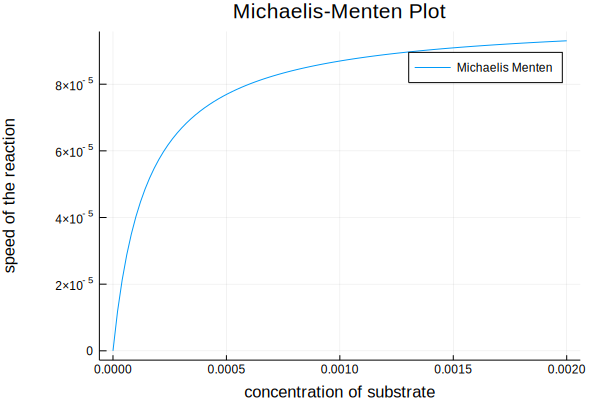

In [38]:
s_vector= s0*LinRange(0,1,100)
plot(s_vector,k3 * e0 * s_vector ./(s_vector.+(k3+k2)/k1),label="Michaelis Menten",)
println("K_m = ",(k3+k2)/k1)
title!("Michaelis-Menten Plot")
xlabel!("concentration of substrate")
ylabel!("speed of the reaction")

### How good is the Michaelis-menten Approach

We can compare this analytical equation with the result of the numerical simulation of the full ODE system. To do that we solve the numerical system, and compare the rates of the reactions predicted by the MAss action and the Michaelis-Menten approach.

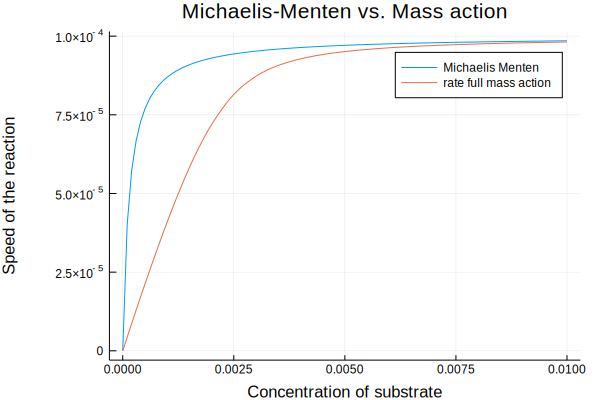

In [39]:
"k1=1e2
k2=1e0
k3=0.01
e0=1e-2
s0=1e-2"

s_vector= s0*LinRange(0,1,100)*5
p=[k1,k2,k3,e0]
plot(s_vector,k3 * e0 * s_vector ./(s_vector.+(k3+k2)/k1),label="Michaelis Menten",)
title!("Michaelis-Menten Plot")
xlabel!("Concentration of substrate")
ylabel!("Speed of the reaction")

tspan = (0.0,10)
#p=[1e3,0.1,0.05,0.001]
speed_vector = similar(s_vector)
for i in 1:100 
u0=[s_vector[i],0,0]
    prob = ODEProblem(enzyme_kinetics2!,u0,tspan,p)
    sol_ = solve(prob)
    # we shoudl compute the speed at the maximum formation of Complex. 
    speed=[k3*u[2] for (u,t) in tuples(sol_)]
 speed_vector[i]=maximum(speed)
end
plot!(s_vector,speed_vector,label="rate full mass action",)
title!("Michaelis-Menten vs. Mass action")
xlabel!("Concentration of substrate")
ylabel!("Speed of the reaction")

This analysis shows that the Michaelis-Menten approach is valid when the amount of $s$ is higher that amount of $e$

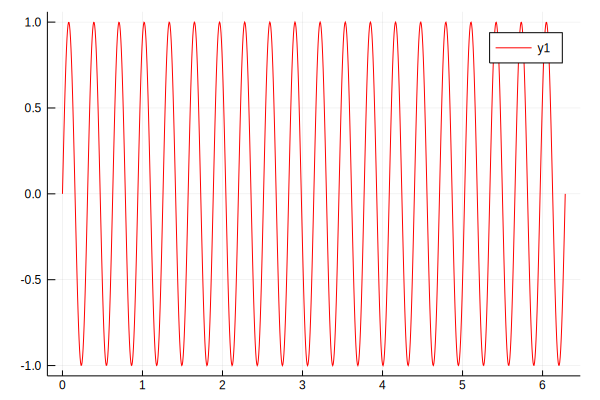

Done!


In [25]:
using Plots
default(show=:ijulia)
for i in 1:20
    IJulia.clear_output(false)
    x = LinRange(0,2*pi,1000); y = sin.(i*x)
    Plots.display(plot(x,y, color="red"))
    sleep(0.1)
end
println("Done!")

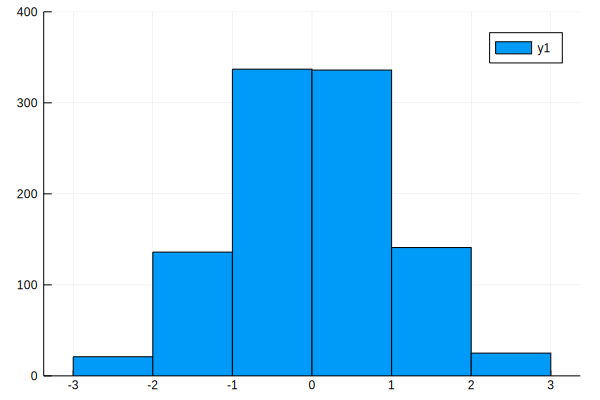

In [20]:
using Plots
default(show=:ijulia)
bins = collect(-3:3); ylims = (0, 400)
p = histogram(randn(1000), bins = bins, ylims = ylims)

for i in 1:10
    h = histogram(randn(1000), bins = bins, ylims = ylims);
    p[1] = h.series_list[1][:x], h.series_list[1][:y]
    sleep(0.2)
    p
end